<a href="https://colab.research.google.com/github/mahemon/PySpark-practice/blob/main/Data_plot_in_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download and install Spark

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark



#Setup environment
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [89.9 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Ge

In [ ]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import seaborn as sns
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/s3parquet')
# write
# df.to_parquet('my_newfile.parquet')

,dataPointId,journeyId,cst-time,speed,accelerationType,latitude,longitude,heading,next_speed,next_diff,DiffInSe,Speed_Rate,breaking,breakevent
0,a485a7bd-15d1-41fc-8bf5-5e4519fd9a71,T08FB6FF71633063632976_1_0,2021-10-01 00:00:01,128.70,None,41.876831,-96.104401,175.0,128.81,0.11,1,0.11,0,None
1,f5470527-d885-49b1-82cc-178dbda5efee,T08FB6FF71633063632976_1_0,2021-10-01 00:00:02,128.81,None,41.876511,-96.104363,175.0,128.63,-0.18,1,-0.18,0,None
2,1d2c4802-3420-418a-bd06-75fe3db810cb,T07FFDAEC1633065606367_1_2,2021-10-01 00:00:02,129.00,None,41.963505,-93.570396,178.0,128.36,-0.64,18,-0.04,0,None
3,b16a0bca-05a7-42e8-82b0-359c5f05747d,T07FBFF6D1633068947530_1_0,2021-10-01 00:00:02,128.91,None,41.519096,-90.674171,2.0,128.27,-0.64,12,-0.05,0,None
4,3a4437b6-1592-49db-a8a2-ce534392d864,T08FB6FF71633063632976_1_0,2021-10-01 00:00:03,128.63,None,41.876190,-96.104332,175.0,128.75,0.12,3,0.04,0,None


In [ ]:
df.head(100)

,dataPointId,journeyId,cst-time,speed,accelerationType,latitude,longitude,heading,next_speed,next_diff,DiffInSe,Speed_Rate,breaking,breakevent
0,a485a7bd-15d1-41fc-8bf5-5e4519fd9a71,T08FB6FF71633063632976_1_0,2021-10-01 00:00:01,128.70,None,41.876831,-96.104401,175.0,128.81,0.11,1,0.11,0,None
1,f5470527-d885-49b1-82cc-178dbda5efee,T08FB6FF71633063632976_1_0,2021-10-01 00:00:02,128.81,None,41.876511,-96.104363,175.0,128.63,-0.18,1,-0.18,0,None
2,1d2c4802-3420-418a-bd06-75fe3db810cb,T07FFDAEC1633065606367_1_2,2021-10-01 00:00:02,129.00,None,41.963505,-93.570396,178.0,128.36,-0.64,18,-0.04,0,None
3,b16a0bca-05a7-42e8-82b0-359c5f05747d,T07FBFF6D1633068947530_1_0,2021-10-01 00:00:02,128.91,None,41.519096,-90.674171,2.0,128.27,-0.64,12,-0.05,0,None
4,3a4437b6-1592-49db-a8a2-ce534392d864,T08FB6FF71633063632976_1_0,2021-10-01 00:00:03,128.63,None,41.876190,-96.104332,175.0,128.75,0.12,3,0.04,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4ae63378-aa17-4f91-b4a1-c057aa37e3a8,T08FB6FF71633063632976_1_0,2021-10-01 00:01:55,128.91,None,41.842903,-96.091423,141.0,128.70,-0.21,3,-0.07,0,None
96,57cf3533-cd2e-495e-bf9a-a96d35da9f30,T08FB6FF71633063632976_1_0,2021-10-01 00:01:58,128.70,None,41.842148,-96.090630,141.0,128.78,0.08,1,0.08,0,None
97,65fd1fef-d7cd-40e9-9abb-c345f571a5a1,T08FB6FF71633063632976_1_0,2021-10-01 00:01:59,128.78,None,41.841892,-96.090363,141.0,128.70,-0.08,3,-0.03,0,None
98,08132ec6-e9b6-49b5-b077-01b8f108f20c,T076FB0951633059349408_1_2,2021-10-01 00:01:59,128.86,None,42.449448,-94.771690,271.0,128.70,-0.16,8,-0.02,0,None


In [ ]:
ndf = df[df['Speed_Rate'] < 0]
ndf = ndf[ndf['Speed_Rate'] > -10]

In [ ]:
ndf=ndf.rename(columns={"cst-time": "csttime"})

In [ ]:
ndf['Dates'] = pd.to_datetime(ndf['csttime']).dt.date
ndf['csttime'] = pd.to_datetime(ndf['csttime']).dt.time

In [ ]:
ndf.head()

,dataPointId,journeyId,csttime,speed,accelerationType,latitude,longitude,heading,next_speed,next_diff,DiffInSe,Speed_Rate,breaking,breakevent,Dates
1,f5470527-d885-49b1-82cc-178dbda5efee,T08FB6FF71633063632976_1_0,00:00:02,128.81,None,41.876511,-96.104363,175.0,128.63,-0.18,1,-0.18,0,None,2021-10-01
2,1d2c4802-3420-418a-bd06-75fe3db810cb,T07FFDAEC1633065606367_1_2,00:00:02,129.00,None,41.963505,-93.570396,178.0,128.36,-0.64,18,-0.04,0,None,2021-10-01
3,b16a0bca-05a7-42e8-82b0-359c5f05747d,T07FBFF6D1633068947530_1_0,00:00:02,128.91,None,41.519096,-90.674171,2.0,128.27,-0.64,12,-0.05,0,None,2021-10-01
5,333d413a-0a87-4ac8-80a0-c1a1f891aba2,T076FB0951633059349408_1_2,00:00:04,128.77,None,42.449280,-94.721550,269.0,128.47,-0.30,15,-0.02,0,None,2021-10-01
6,77669e47-3074-41fa-8bb2-1fe00b87cf13,T08FB6FF71633063632976_1_0,00:00:06,128.75,None,41.875233,-96.104233,175.0,128.63,-0.12,3,-0.04,0,None,2021-10-01


Text(0.5, 1.0, 'time vs speed')

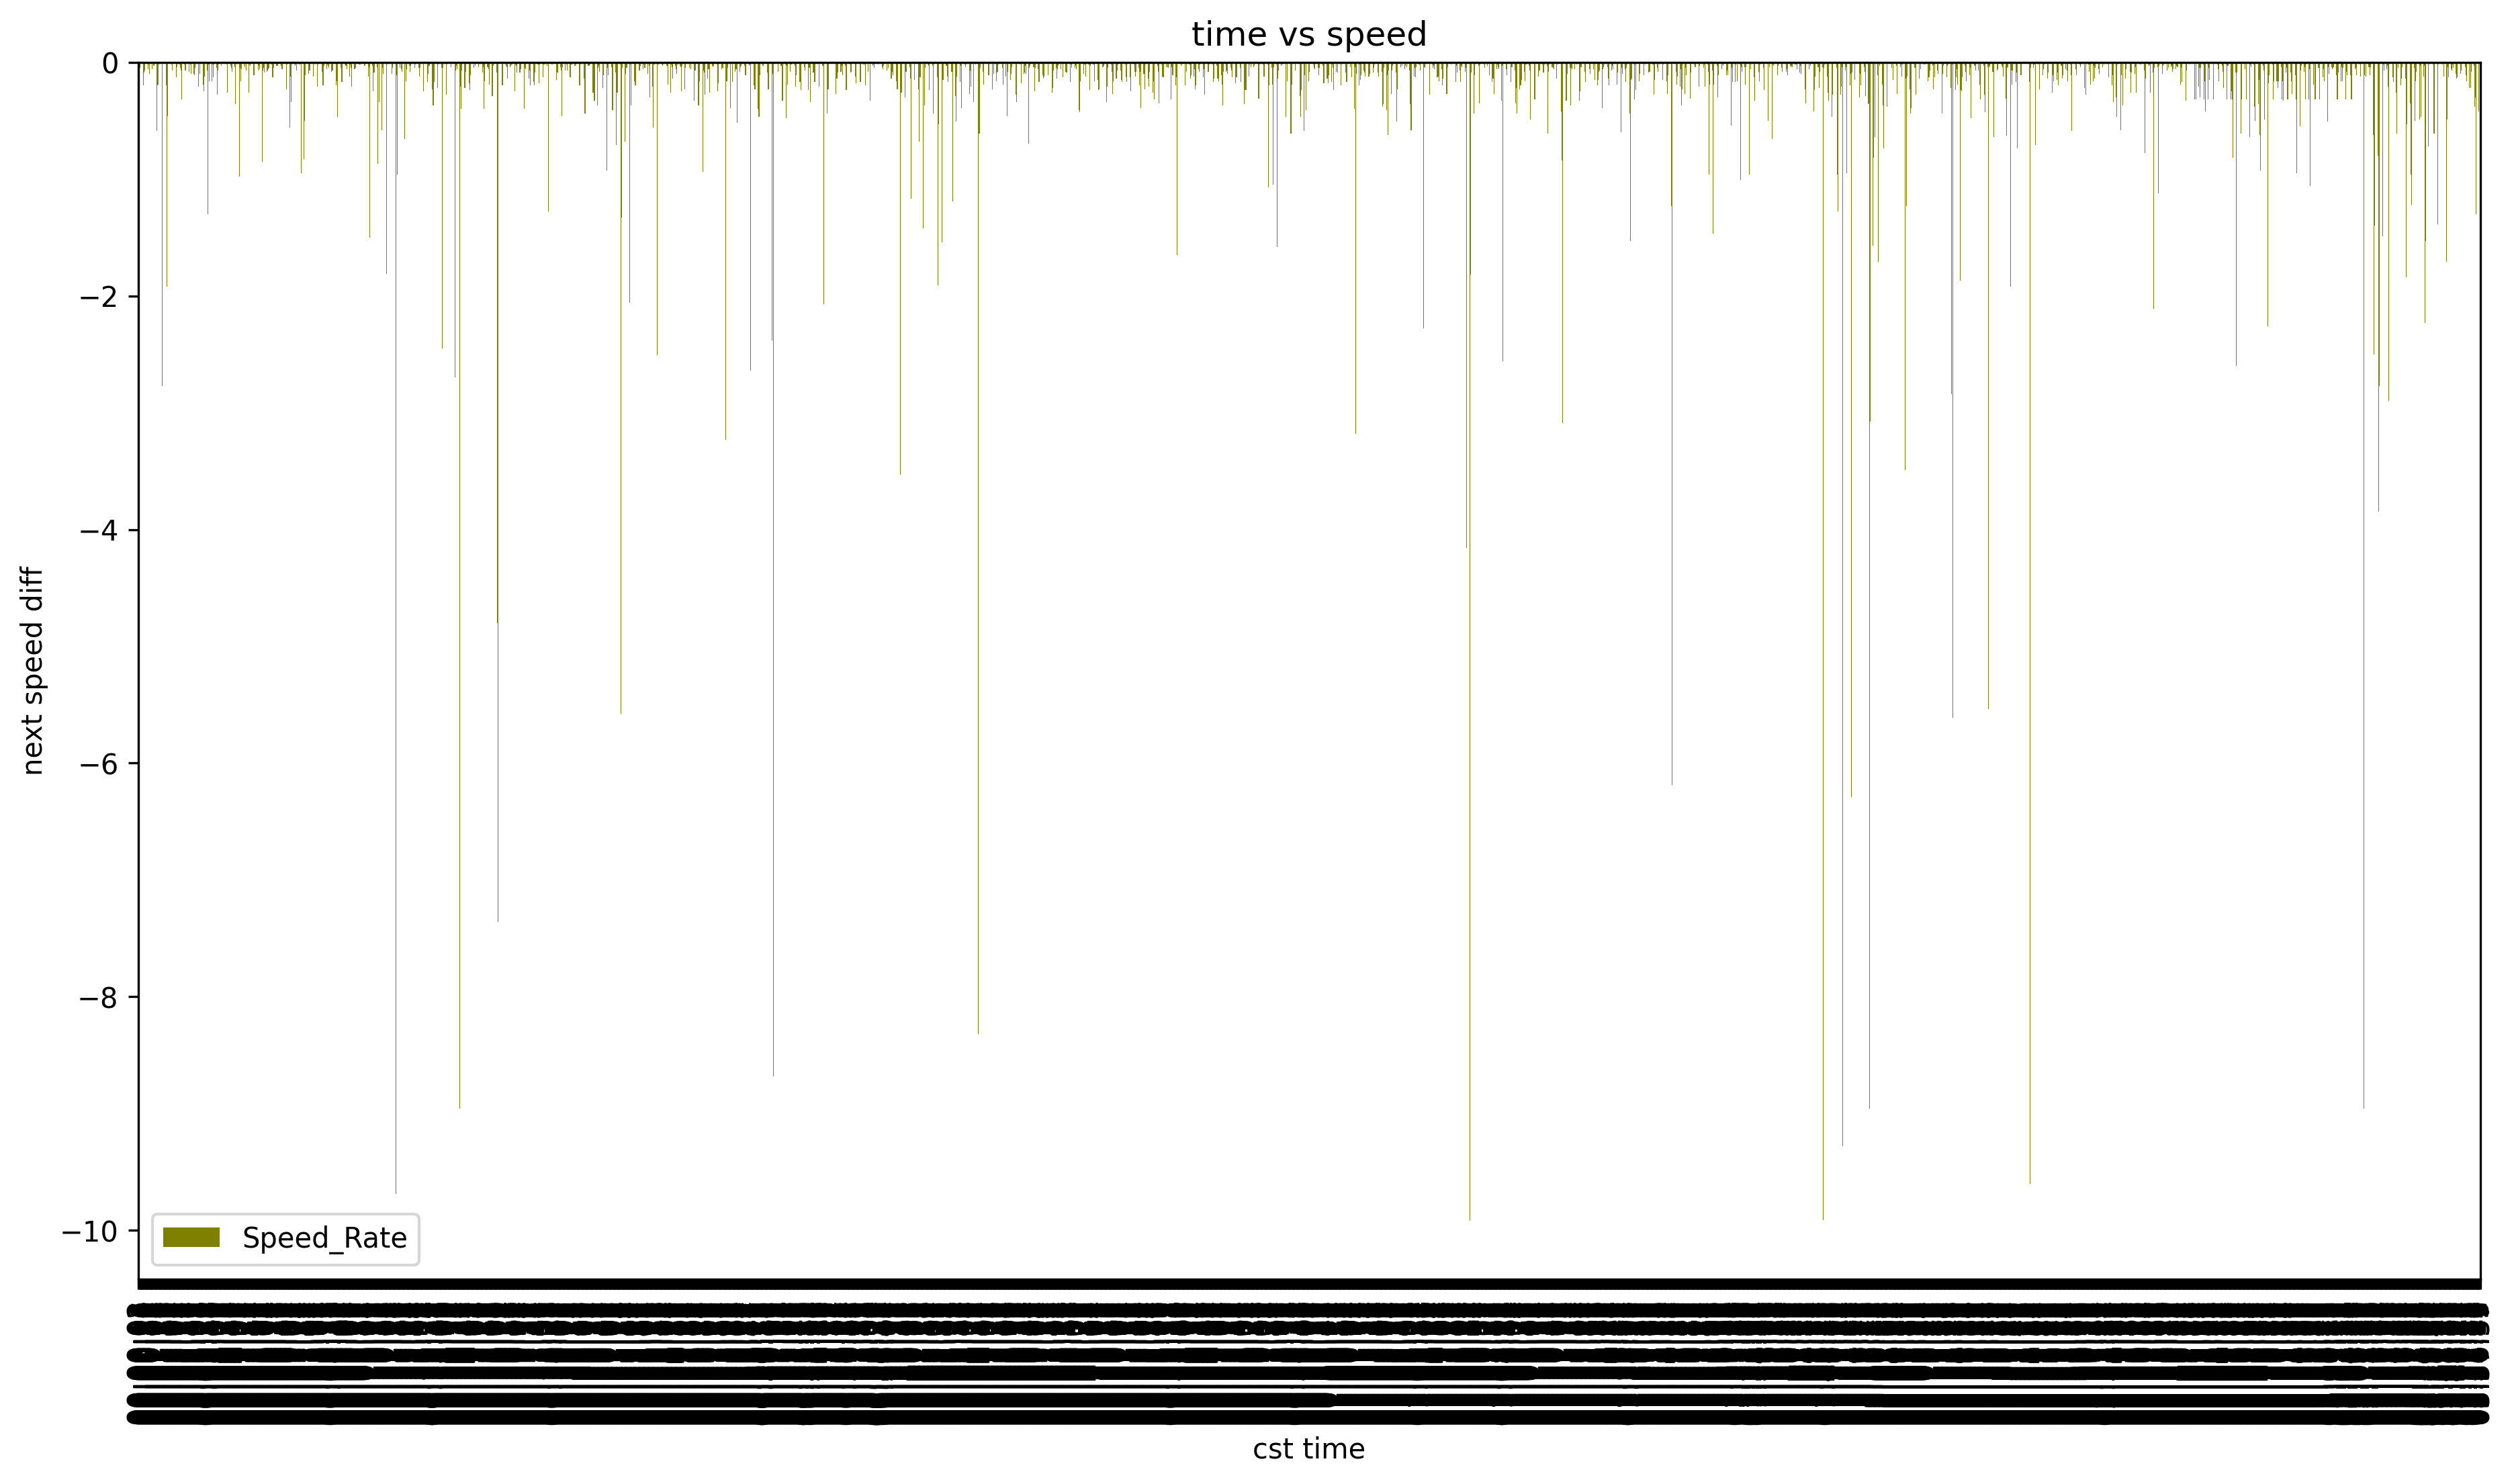

In [ ]:
ndf.plot(kind='bar', color='olive', x ='csttime', y ='Speed_Rate',figsize=(15, 8))
plt.xlabel('cst time')
plt.ylabel('next speed diff')
plt.title('time vs speed')

In [ ]:
print(ndf["Speed_Rate"].min())
print(ndf["Speed_Rate"].max())

-9.92
-0.01


In [ ]:
#ndf['workingday'] = ndf['csttime'].astype('float')

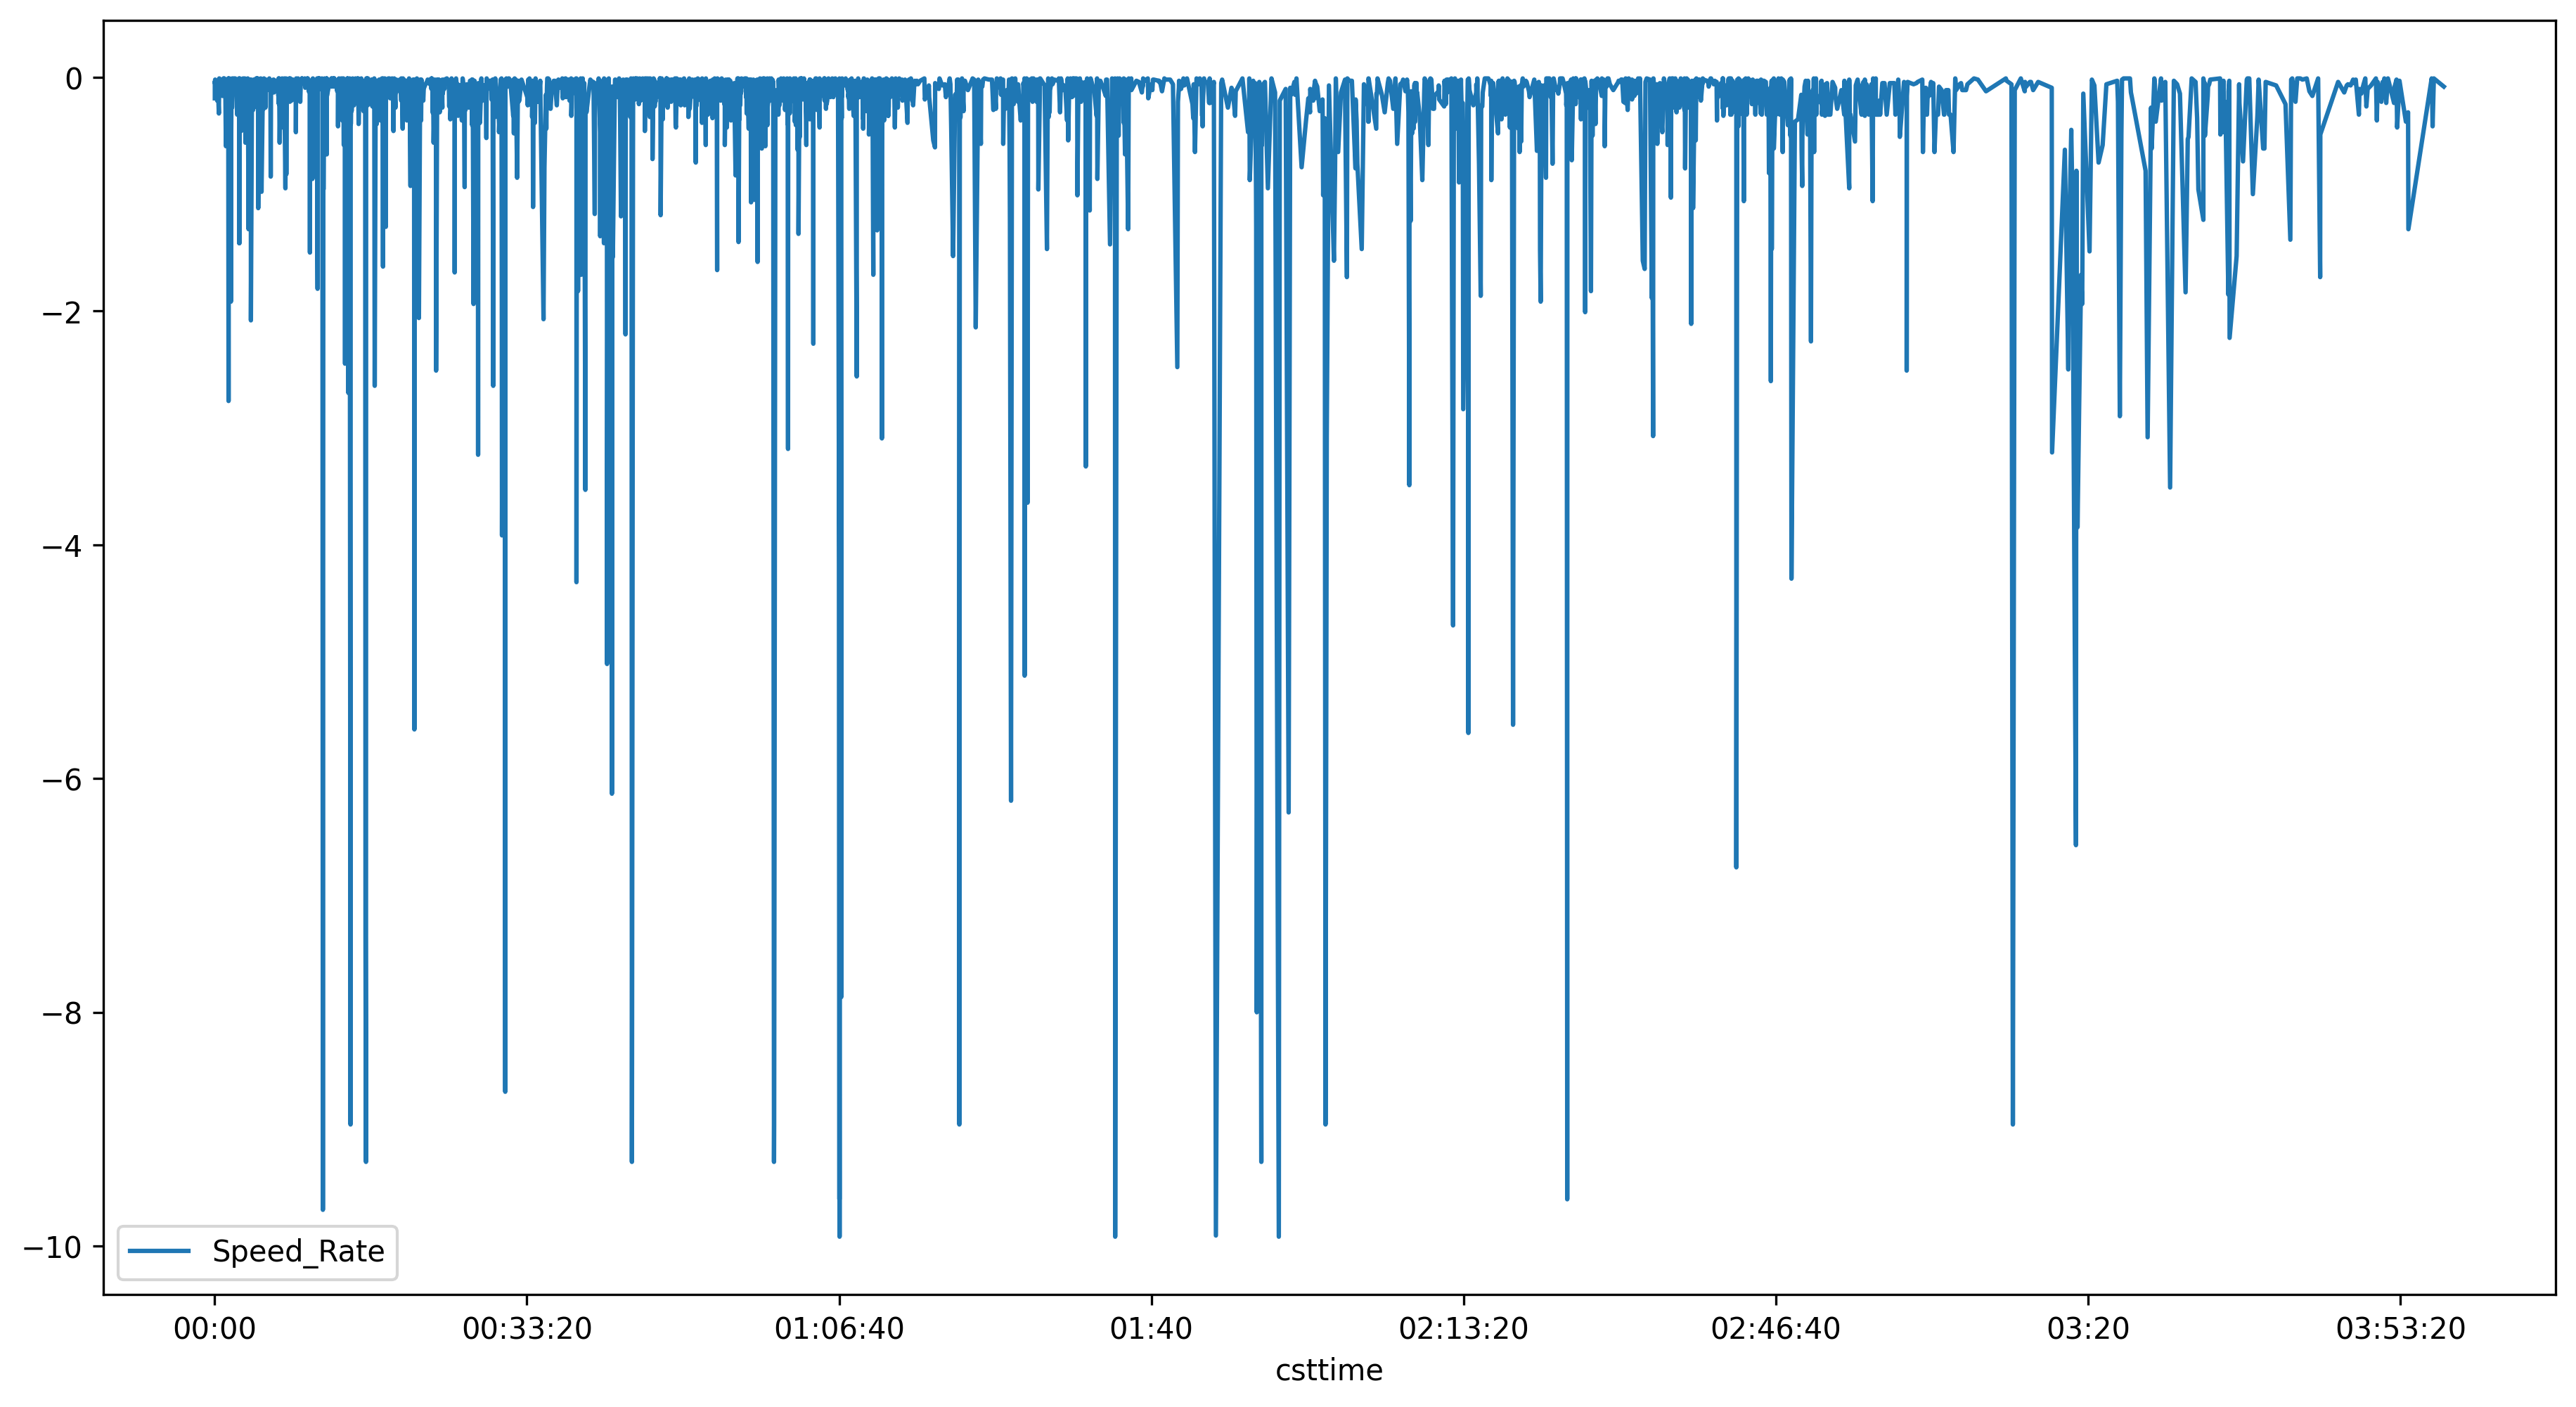

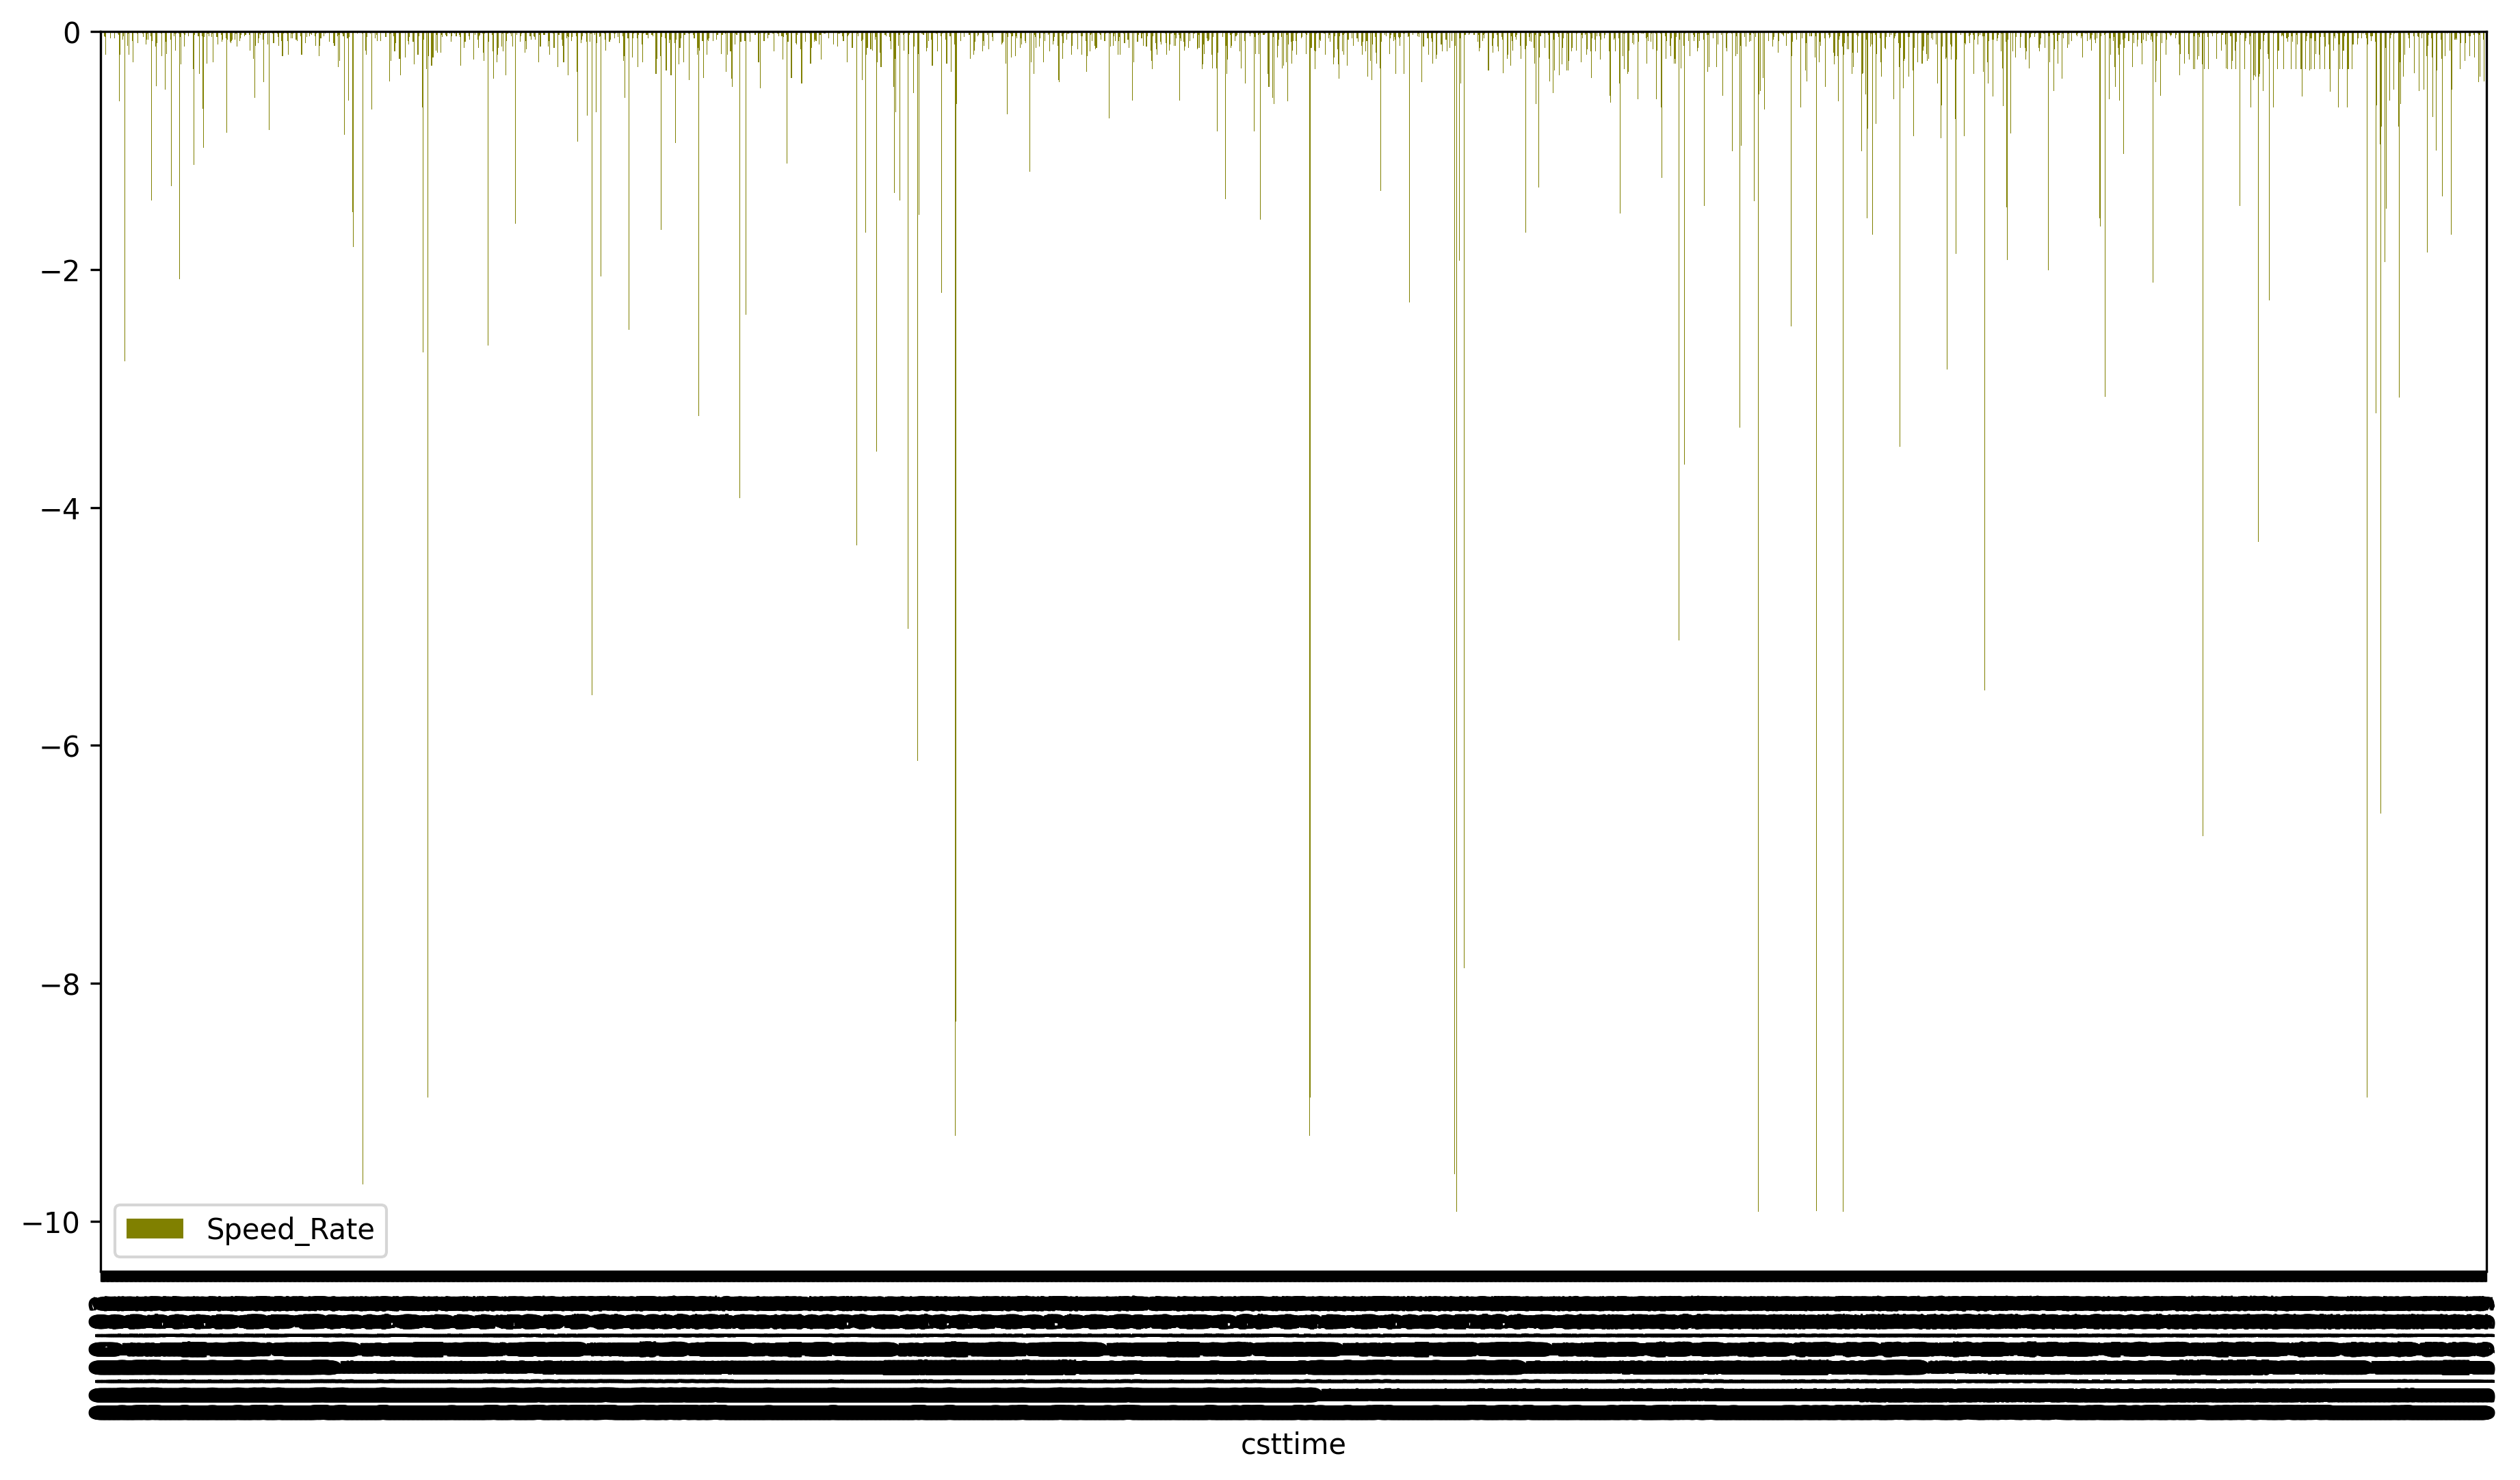

In [ ]:
ndf.plot(x='csttime', y='Speed_Rate', figsize=(15, 8))
ndf.plot(kind='bar', color='olive', x ='csttime', y ='Speed_Rate',figsize=(15, 8))

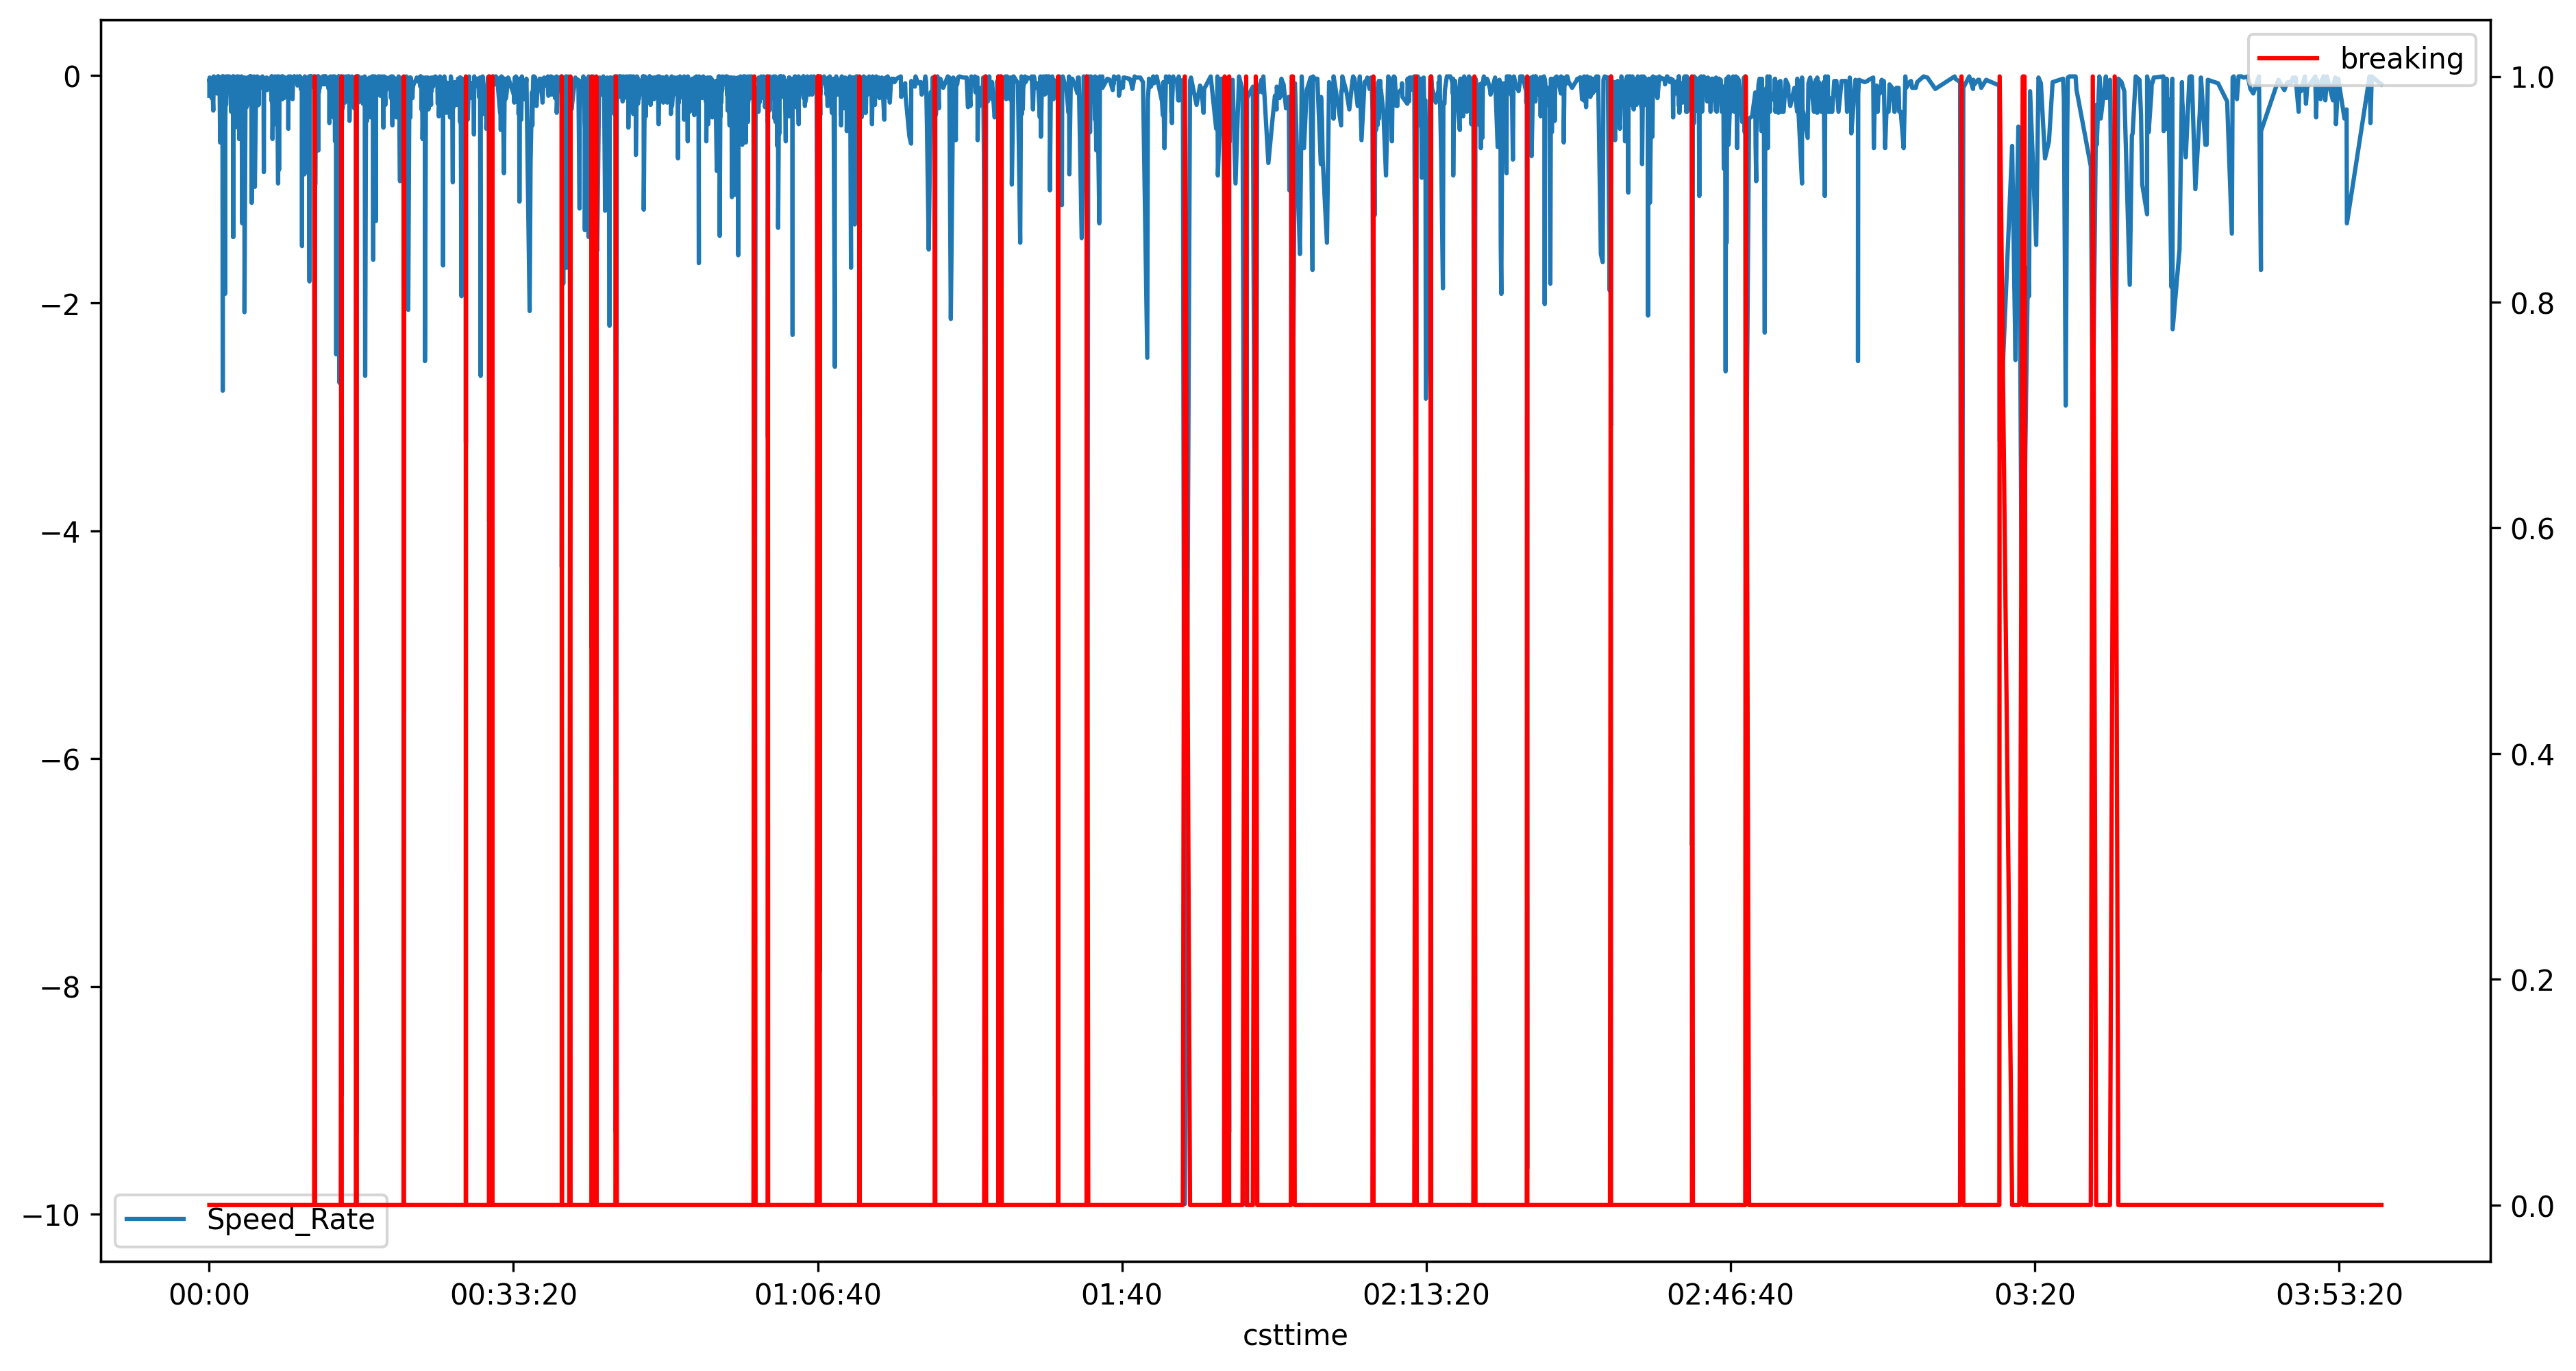

In [ ]:
#plt.figure(figsize=(15, 8))
ax = plt.gca()
ndf.plot(x ='csttime', y ='Speed_Rate',figsize=(15, 8) , ax=ax)
#ndf.plot(x='csttime', y='Speed_Rate', ax=ax);
ax2 = ax.twinx()
ndf.plot(x='csttime', y='breaking', color='red', ax=ax2);

In [ ]:
ndf=ndf.loc[(ndf['accelerationType'] == "HARD_BRAKE") | (ndf['accelerationType'] == "HARD_ACCELERATION")]

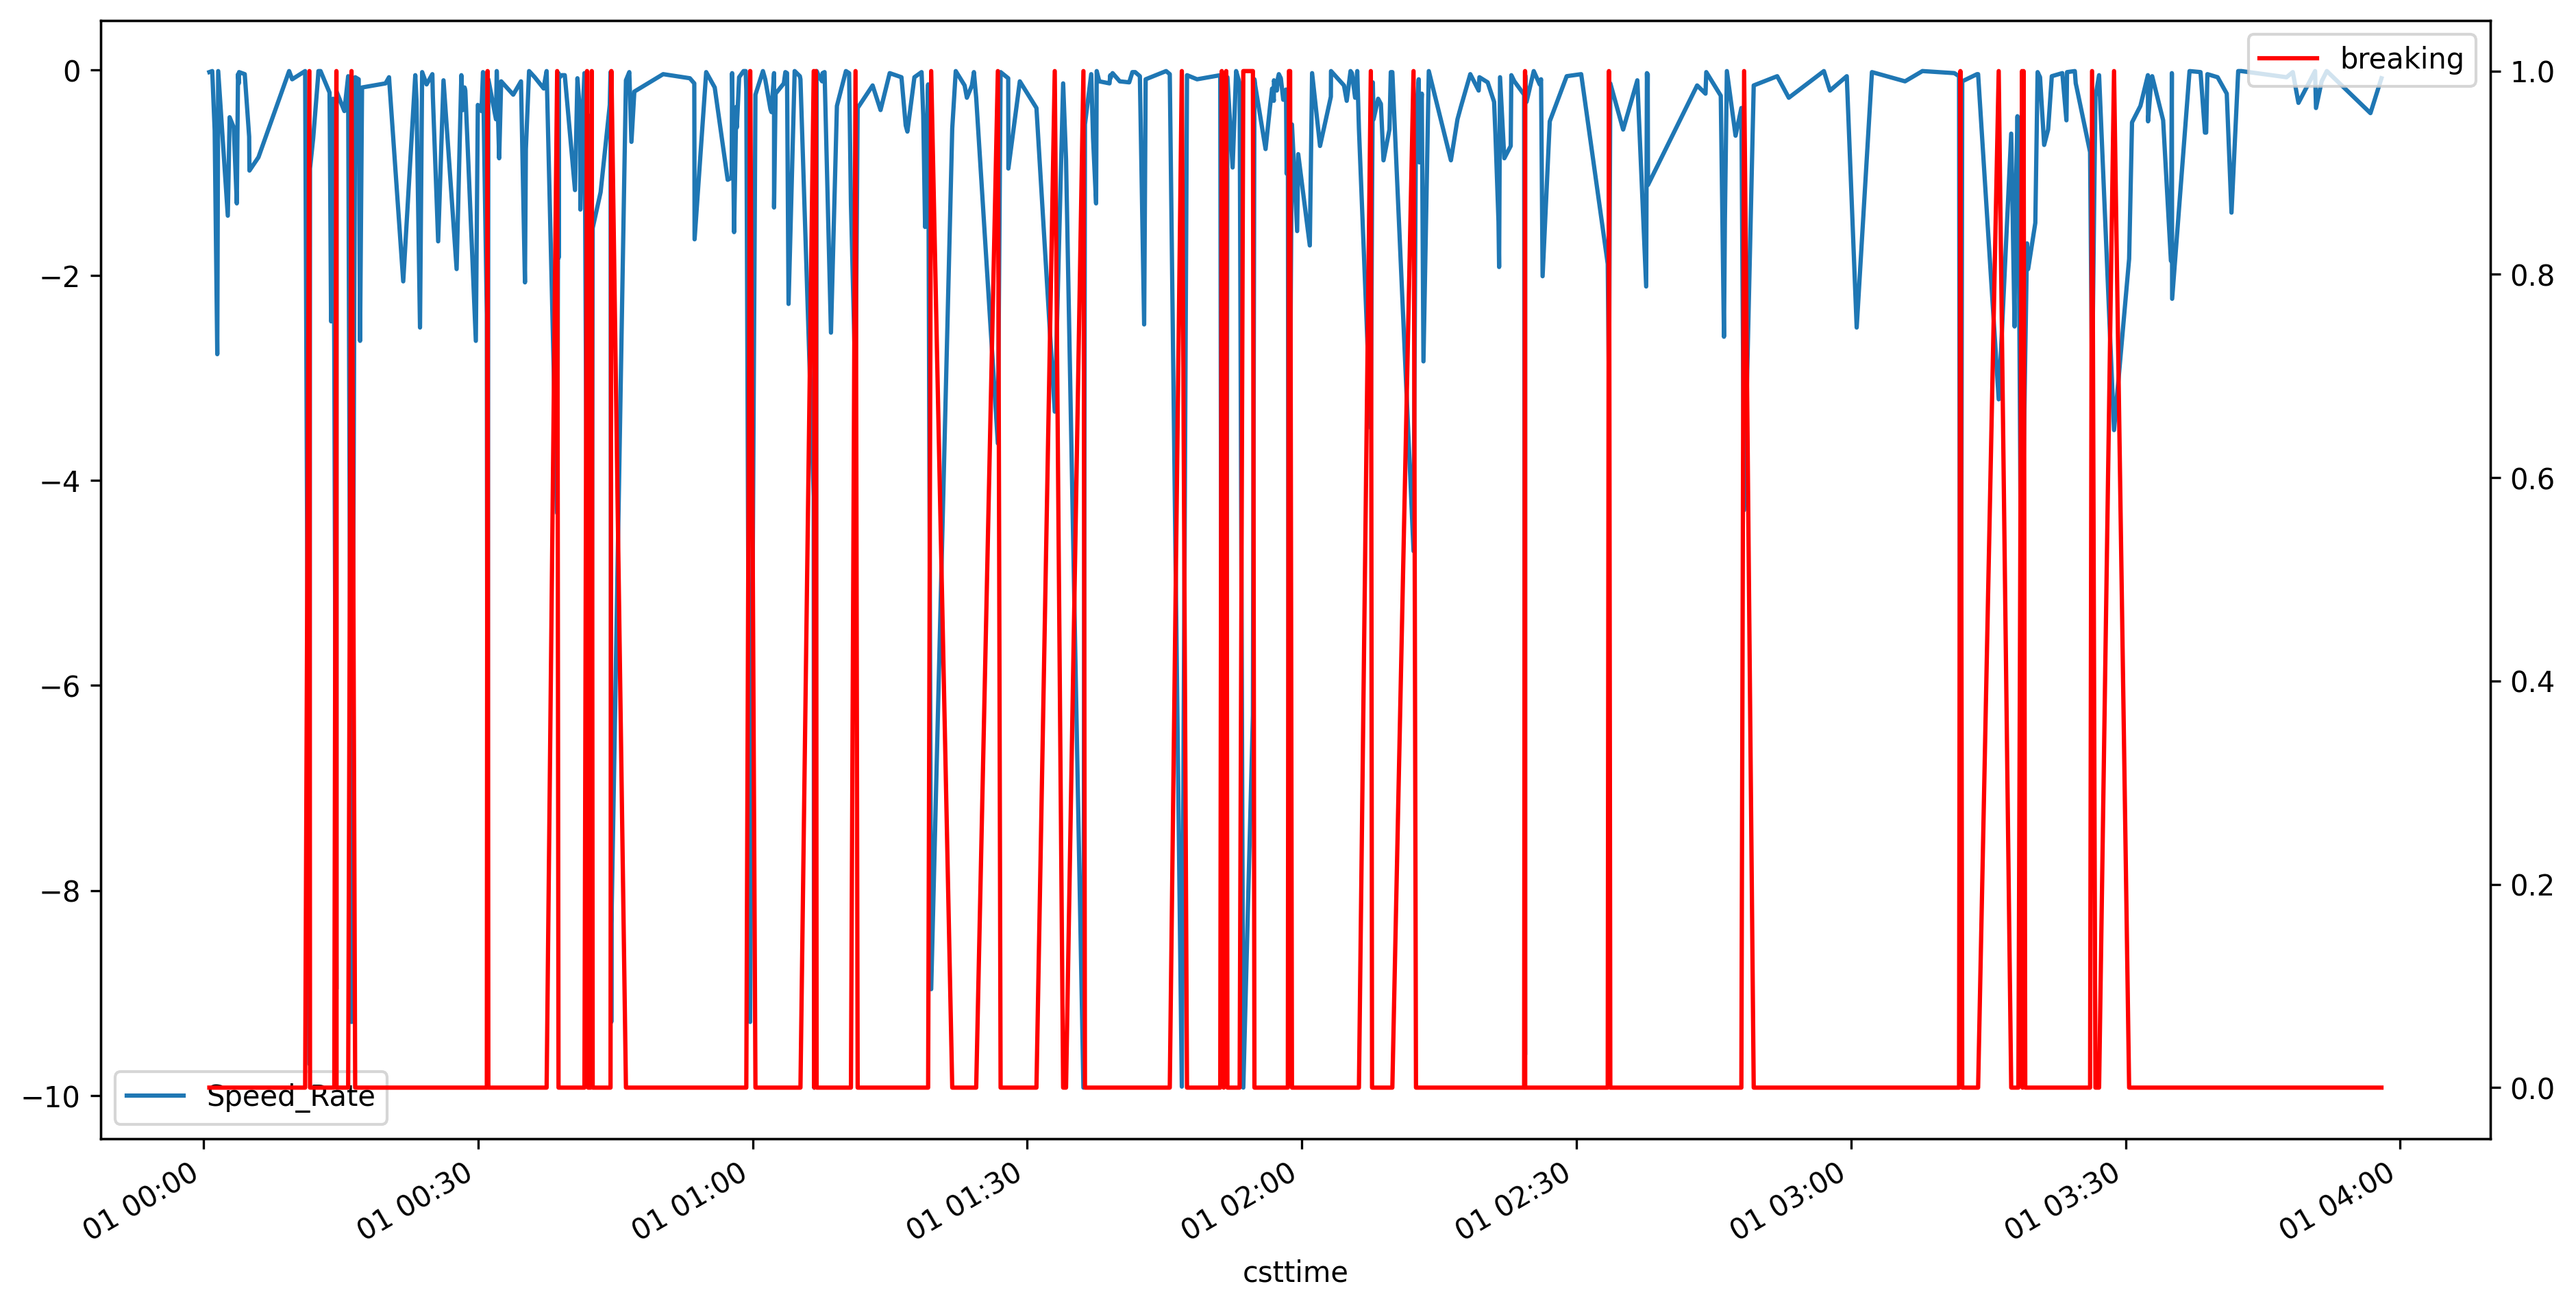

In [ ]:
#plt.figure(figsize=(15, 8))
ax = plt.gca()
ndf.plot(x ='csttime', y ='Speed_Rate',figsize=(15, 8) , ax=ax)
#ndf.plot(x='csttime', y='Speed_Rate', ax=ax);
ax2 = ax.twinx()
ndf.plot(x='csttime', y='breaking', color='red', ax=ax2);

## Breaking

In [ ]:
# read
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wejo/save-allResults 6002 data.csv')
# write
# df.to_parquet('my_newfile.parquet')

Text(0.5, 1.0, 'routeId vs measure')

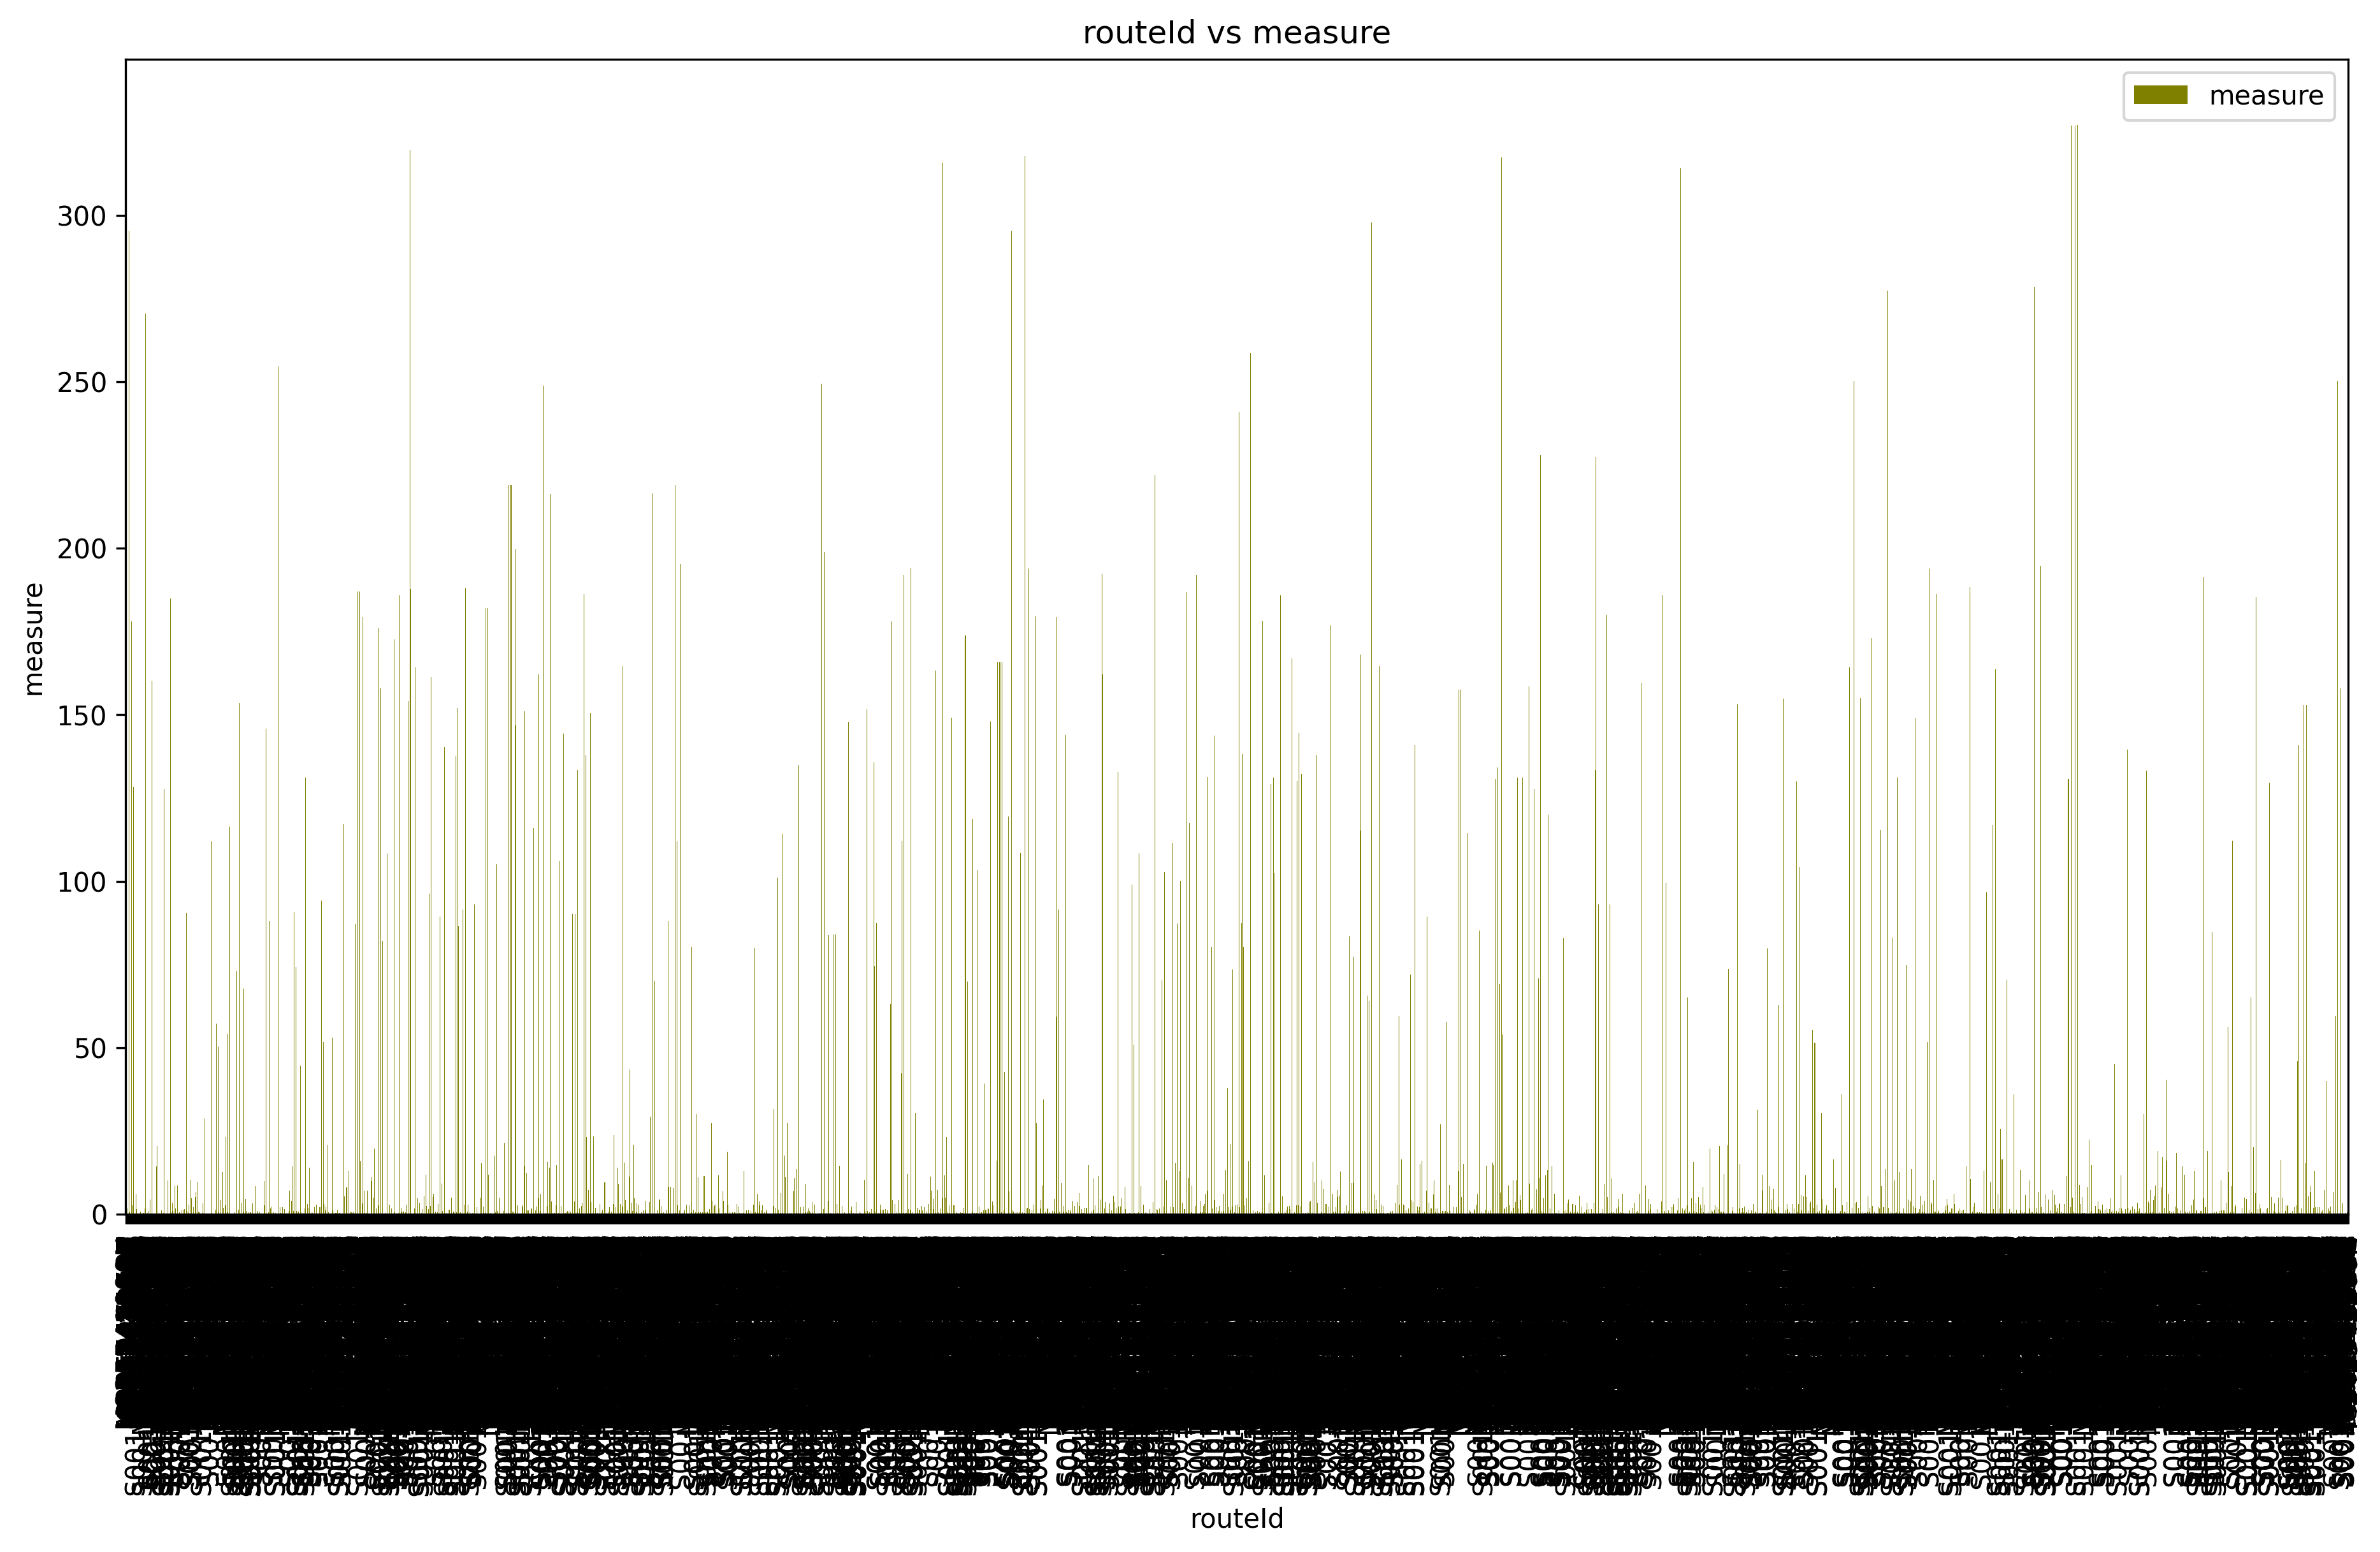

In [ ]:
df.plot(kind='bar', color='olive', x ='csttime', y ='routeId',figsize=(15, 8))
plt.xlabel('csttime')
plt.ylabel('routeId')
plt.title('routeId vs measure')